# INIT

In [1]:
%cd ..

G:\CODE\PlasmaChemistry


In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from plasmistry.electron import EEDF
from plasmistry.electron import get_maxwell_eedf
from plasmistry.molecule import get_ideal_gas_density

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 17

In [4]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

# Read inelas reactions

In [5]:
file_name_list = ['rctn_df_CO_e_vib_forward.pkl',
                  'rctn_df_CO_e_vib_backward.pkl',
                  'rctn_df_CO2_e_vib_forward.pkl',
                  'rctn_df_CO2_e_vib_backward.pkl']
chosen = (2,3)
file_name_list = [file_name_list[i] for i in range(len(file_name_list)) if i in chosen]
_df = pd.DataFrame(columns=['formula','type', 'threshold_eV', 'cross_section'])
for file_name in file_name_list:
    _df = _df.append(pd.read_pickle(file_name), ignore_index=True)
inelas_df = _df

FileNotFoundError: [Errno 2] No such file or directory: 'rctn_df_CO2_e_vib_forward.pkl'

# Choose the reactions considered.

In [5]:
# inelas_df = inelas_df.iloc[[0,1,2,3,4,5,6,7,8]].reset_index(drop=True)
# inelas_df = inelas_df.iloc[[0,1,2]].reset_index(drop=True)
inelas_df

,formula,type,threshold_eV,cross_section
0,E + CO2 => E + CO2(v1),EXCITATION,0.2912574773137701,"[[0.291, 0.3, 0.31, 0.32, 0.33, 0.35, 0.38, 0...."
1,E + CO2 => E + CO2(v2),EXCITATION,0.5794227887444736,"[[0.57939, 0.58839, 0.59839, 0.60839, 0.61839,..."
2,E + CO2 => E + CO2(v3),EXCITATION,0.8644959342921104,"[[0.86469, 0.87369, 0.88369, 0.89369, 0.90369,..."
3,E + CO2 => E + CO2(v4),EXCITATION,1.1464769139566813,"[[1.1469, 1.1559, 1.1659, 1.1759, 1.1859, 1.20..."
4,E + CO2 => E + CO2(v5),EXCITATION,1.4253657277381855,"[[1.42601, 1.43501, 1.44501, 1.45501, 1.46501,..."
5,E + CO2 => E + CO2(v6),EXCITATION,1.701162375636623,"[[1.70203, 1.71103, 1.72103, 1.73103, 1.74103,..."
6,E + CO2 => E + CO2(v7),EXCITATION,1.9738668576519955,"[[1.97495, 1.98395, 1.99395, 2.00395, 2.01395,..."
7,E + CO2 => E + CO2(v8),EXCITATION,2.2434791737843,"[[2.24478, 2.25378, 2.26378, 2.27378, 2.28378,..."
8,E + CO2 => E + CO2(v9),EXCITATION,2.5099993240335396,"[[2.51151, 2.52051, 2.53051, 2.54051, 2.55051,..."
9,E + CO2 => E + CO2(v10),EXCITATION,2.7734273083997114,"[[2.77515, 2.78415, 2.79415, 2.80415, 2.81415,..."


limit_output extension: Maximum message size of 10000 exceeded with 13126 characters

In [6]:
inelas_df['threshold_eV'] = inelas_df['threshold_eV'].astype(float)

In [7]:
inelas_df['cross_section'][0]

array([[2.9e-01, 3.0e-01, 3.1e-01, 3.2e-01, 3.3e-01, 3.5e-01, 3.8e-01, 4.0e-01, 4.5e-01, 5.0e-01, 6.0e-01, 8.0e-01, 1.0e+00,
        1.5e+00, 2.0e+00, 3.0e+00, 4.5e+00, 6.0e+00, 8.0e+00, 1.0e+01, 2.5e+01, 3.0e+01, 1.0e+02],
       [0.0e+00, 9.5e-21, 1.7e-20, 1.9e-20, 2.0e-20, 2.2e-20, 2.2e-20, 2.2e-20, 2.0e-20, 1.9e-20, 1.5e-20, 1.2e-20, 1.0e-20,
        7.6e-21, 6.4e-21, 4.9e-21, 4.4e-21, 4.1e-21, 4.8e-21, 2.6e-21, 1.4e-21, 1.0e-21, 0.0e+00]])

In [8]:
eedf = EEDF(max_energy_eV=50, grid_number=500)
# total_species = ['E', 'CO'] + [f'CO(v{v})' for v in range(1, 11)]
total_species = ['E', 'CO2'] + [f'CO2(v{v})' for v in range(1, 22)]

In [9]:
eedf.initialize(rctn_with_crostn_df=inelas_df, total_species=total_species)
# eedf.initialize(rctn_with_crostn_df=inelas_df, total_species=['E', 'H2', 'H2(v1)', 'H2(v2)', 'H2(v3)'])

## properties

In [10]:
eedf.rate_const_matrix_e_inelas_electron.toarray()

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  6.9e-15,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  6.6e-16,  7.3e-15, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  7.0e-16, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00, -7.5e-15,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, -8.0e-15, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ..., -1.1e-14,  0.0e+00,  1.1e-15,  1.9e-15,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00, -1.1e-14,  0.0e+00,  1.1e-15,  1.9e-15],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  1.0e-15,  0.0e+00, -7.7e-15,  0.0e+00,  1.1e-15],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  2.0e-15,  1.

In [11]:
eedf.rate_const_matrix_e_inelas_electron.shape

(10500, 500)

In [12]:
eedf.rate_const_matrix_e_inelas_molecule.shape

(420, 500)

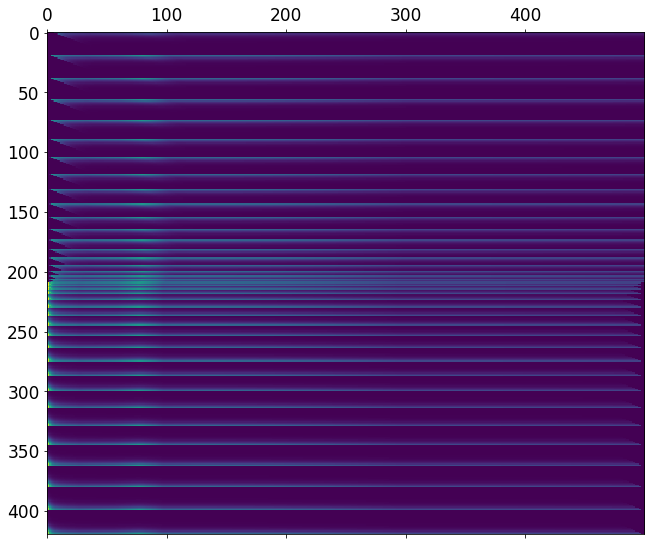

In [13]:
plt.matshow(eedf.rate_const_matrix_e_inelas_molecule)

In [14]:
eedf.n_bg_molecule_elas

1

In [15]:
eedf.bg_molecule_elas

['CO2']

In [16]:
eedf.n_bg_molecule_inelas

21

In [17]:
eedf.bg_molecule_inelas

array(['CO2', 'CO2(v1)', 'CO2(v10)', 'CO2(v11)', 'CO2(v12)', 'CO2(v13)', 'CO2(v14)', 'CO2(v15)', 'CO2(v16)', 'CO2(v17)',
       'CO2(v18)', 'CO2(v19)', 'CO2(v2)', 'CO2(v20)', 'CO2(v3)', 'CO2(v4)', 'CO2(v5)', 'CO2(v6)', 'CO2(v7)', 'CO2(v8)',
       'CO2(v9)'], dtype=object)

In [18]:
eedf.n_inelas_rctn

420

In [19]:
eedf.bg_molecule_inelas_in_order

array(['CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2', 'CO2',
       'CO2', 'CO2', 'CO2', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)',
       'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v1)', 'CO2(v2)',
       'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)',
       'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v2)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)',
       'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)', 'CO2(v3)',
       'CO2(v3)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)',
       'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v4)', 'CO2(v5)', 'CO2(v5)', 'CO2(v5)', '

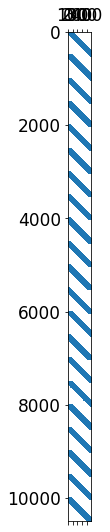

In [20]:
plt.spy(eedf.rate_const_matrix_e_inelas_electron, markersize=2)

In [21]:
eedf.rate_const_matrix_e_inelas_molecule

array([[0.0e+00, 0.0e+00, 1.4e-36, 1.2e-34, 1.3e-34, ..., 4.8e-35, 4.8e-35, 4.8e-35, 4.8e-35, 4.8e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 2.9e-35, 2.9e-35, 2.9e-35, 2.9e-35, 2.9e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 1.8e-35, 1.8e-35, 1.8e-35, 1.8e-35, 1.8e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 1.1e-35, 1.1e-35, 1.1e-35, 1.1e-35, 1.1e-35],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, ..., 6.7e-36, 6.7e-36, 6.7e-36, 6.7e-36, 6.6e-36],
       ...,
       [4.0e-35, 1.0e-34, 6.7e-35, 5.1e-35, 4.2e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [5.4e-35, 1.4e-34, 9.2e-35, 7.1e-35, 5.9e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [6.9e-35, 1.8e-34, 1.2e-34, 9.5e-35, 8.1e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [8.0e-35, 2.1e-34, 1.5e-34, 1.2e-34, 9.7e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [7.7e-35, 2.1e-34, 1.5e-34, 1.4e-34, 1.3e-34,

In [22]:
N = get_ideal_gas_density(p_Pa=1e5, Tgas_K=3500)
N

2.0694208821943807e+24

# Set parameters

In [48]:
eedf.set_parameters(E=100/0.01, Tgas=3500, N=N)

In [49]:
total_species_density = np.ones(len(total_species))* N
# total_species_density = np.array([0,1,0,0,0])*N
def dndt_all(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    return eedf.get_deriv_total(total_species_density=total_species_density) 

In [50]:
y0 = get_maxwell_eedf(eedf.energy_point, Te_eV=0.7)*1e20
time_span = [0, 1e3]
sol = solve_ivp(dndt_all, time_span, y0, method="BDF")

In [51]:
len(sol.t)

201

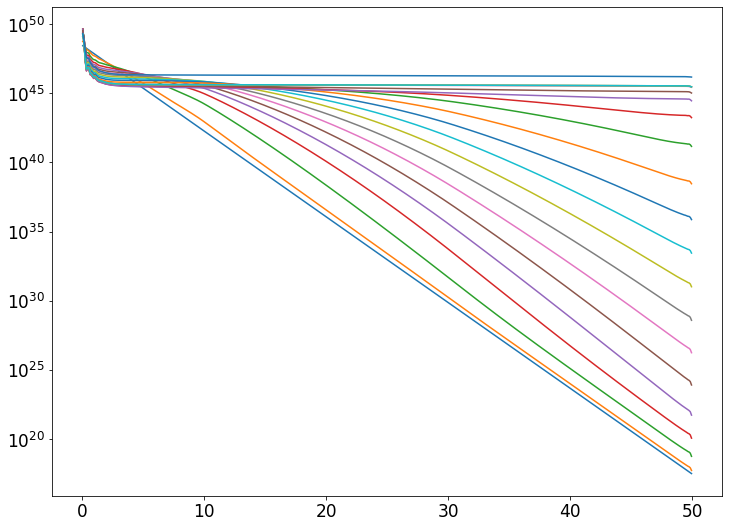

In [52]:
plt.semilogy(eedf.energy_point_eV, (sol.y.transpose()/np.sqrt(eedf.energy_point)).transpose()[:,::10])

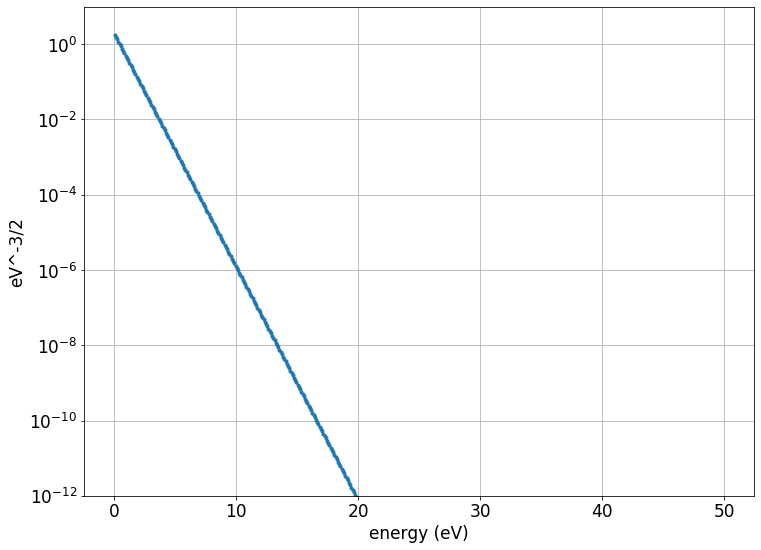

In [53]:
eedf.set_density_per_J(sol.y[:,0])
eedf.plot_normalized_eepf()

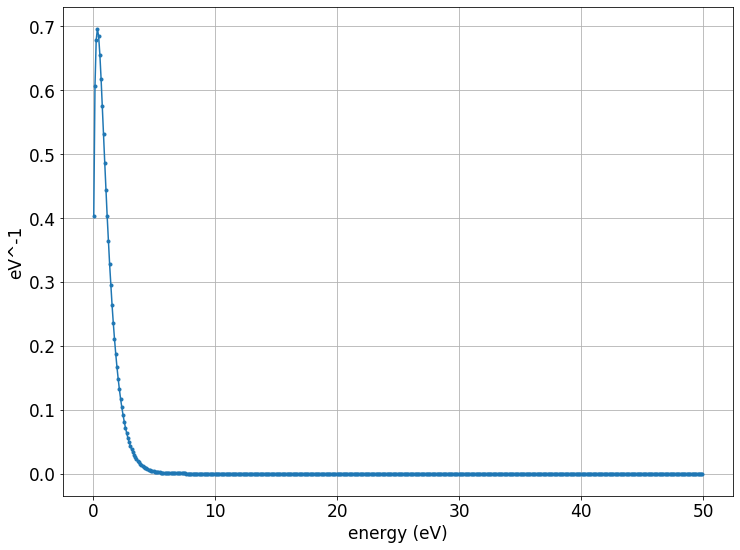

In [54]:
eedf.plot_normalized_eedf()

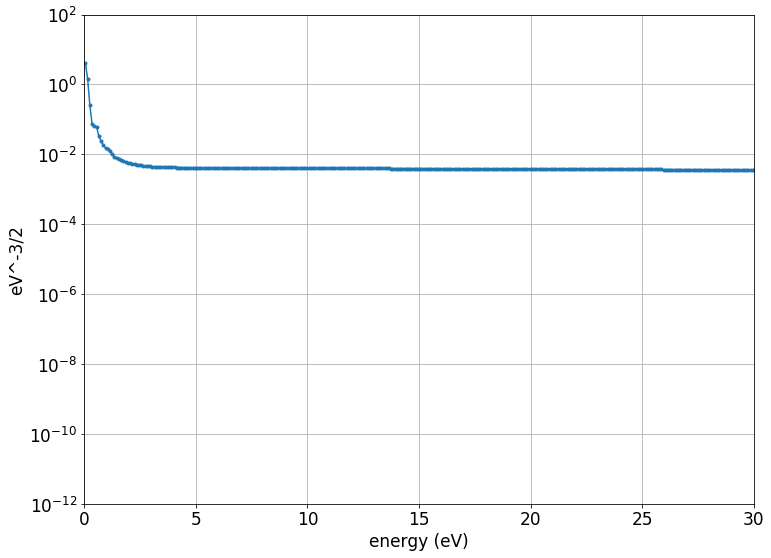

In [55]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf(xlim=(0,30), ylim=(1e-12, 1e2))


In [56]:
np.savetxt('output.dat', np.vstack((eedf.energy_point_eV, eedf.normalized_eepf_eV)).transpose())

In [57]:
print(eedf)


        
        
               ENERGY SPACE (eV) : (0.0, 50.0)
        
     NUMBER OF DISCRETIZED CELLS : 500 cells
        
            ENERGY INTERVAL (eV) : 0.100 
        
        
            ELECTRON TEMPERATURE : 16.1902 eV
        
            ELECTRON MEAN ENERGY : 24.2853 eV
        
                ELECTRON DENSITY : 3.39e+20 m^-3
        
        
              ELECTRIC FIELD (E) : 10000 V/m (0.10 kV/cm) 
        
          GAS TEMPERATURE (Tgas) : 3500 K
        
 BACKGROUND MOLECULE DENSITY (N) : 2.1e+24 m^-3
        
    REDUCED ELECTRIC FIELD (E/N) : 4.8 Td
        
        
     ELASTIC COLLISION MOLECULES : ['CO2']
        
   INELASTIC COLLISION MOLECULES : ['CO2' 'CO2(v1)' 'CO2(v10)' 'CO2(v11)' 'CO2(v12)' 'CO2(v13)' 'CO2(v14)' 'CO2(v15)' 'CO2(v16)' 'CO2(v17)' 'CO2(v18)' 'CO2(v19)'
 'CO2(v2)' 'CO2(v20)' 'CO2(v3)' 'CO2(v4)' 'CO2(v5)' 'CO2(v6)' 'CO2(v7)' 'CO2(v8)' 'CO2(v9)']
        


In [58]:
eedf._get_molecule_rate_const_e_inelas()

array([3.5e-15, 2.1e-15, 1.3e-15, 7.9e-16, 4.8e-16, 3.0e-16, 1.8e-16, 1.1e-16, 6.8e-17, 4.2e-17, 2.5e-17, 1.6e-17, 9.5e-18,
       5.8e-18, 3.6e-18, 2.2e-18, 1.3e-18, 8.2e-19, 5.0e-19, 3.1e-19, 3.5e-15, 2.1e-15, 1.3e-15, 7.9e-16, 4.8e-16, 2.9e-16,
       1.8e-16, 1.1e-16, 6.8e-17, 4.1e-17, 2.5e-17, 1.6e-17, 9.5e-18, 5.8e-18, 3.6e-18, 2.2e-18, 1.3e-18, 8.2e-19, 5.0e-19,
       3.5e-15, 2.1e-15, 1.3e-15, 7.9e-16, 4.8e-16, 2.9e-16, 1.8e-16, 1.1e-16, 6.8e-17, 4.1e-17, 2.5e-17, 1.6e-17, 9.5e-18,
       5.8e-18, 3.6e-18, 2.2e-18, 1.3e-18, 8.1e-19, 3.5e-15, 2.1e-15, 1.3e-15, 7.9e-16, 4.8e-16, 2.9e-16, 1.8e-16, 1.1e-16,
       6.8e-17, 4.1e-17, 2.5e-17, 1.6e-17, 9.5e-18, 5.8e-18, 3.6e-18, 2.2e-18, 1.3e-18, 3.5e-15, 2.1e-15, 1.3e-15, 7.9e-16,
       4.8e-16, 2.9e-16, 1.8e-16, 1.1e-16, 6.8e-17, 4.1e-17, 2.5e-17, 1.5e-17, 9.5e-18, 5.8e-18, 3.5e-18, 2.2e-18, 3.5e-15,
       2.1e-15, 1.3e-15, 7.9e-16, 4.8e-16, 2.9e-16, 1.8e-16, 1.1e-16, 6.7e-17, 4.1e-17, 2.5e-17, 1.5e-17, 9.5e-18, 5.8e-18,
       3

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(eedf.n_inelas_rctn),
        width=eedf._get_molecule_rate_const_e_inelas(),
        height=0.6, log=True)
ax.set_yticks(range(eedf.n_inelas_rctn))
ax.set_yticklabels(eedf.inelas_reaction_dataframe['formula'])

[Text(0, 0, 'E + CO2 => E + CO2(v1)'),
 Text(0, 0, 'E + CO2 => E + CO2(v2)'),
 Text(0, 0, 'E + CO2 => E + CO2(v3)'),
 Text(0, 0, 'E + CO2 => E + CO2(v4)'),
 Text(0, 0, 'E + CO2 => E + CO2(v5)'),
 Text(0, 0, 'E + CO2 => E + CO2(v6)'),
 Text(0, 0, 'E + CO2 => E + CO2(v7)'),
 Text(0, 0, 'E + CO2 => E + CO2(v8)'),
 Text(0, 0, 'E + CO2 => E + CO2(v9)'),
 Text(0, 0, 'E + CO2 => E + CO2(v10)'),
 Text(0, 0, 'E + CO2 => E + CO2(v11)'),
 Text(0, 0, 'E + CO2 => E + CO2(v12)'),
 Text(0, 0, 'E + CO2 => E + CO2(v13)'),
 Text(0, 0, 'E + CO2 => E + CO2(v14)'),
 Text(0, 0, 'E + CO2 => E + CO2(v15)'),
 Text(0, 0, 'E + CO2 => E + CO2(v16)'),
 Text(0, 0, 'E + CO2 => E + CO2(v17)'),
 Text(0, 0, 'E + CO2 => E + CO2(v18)'),
 Text(0, 0, 'E + CO2 => E + CO2(v19)'),
 Text(0, 0, 'E + CO2 => E + CO2(v20)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v2)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v3)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v4)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v5)'),
 Text(0, 0, 'E + CO2(v1) => E + CO2(v

limit_output extension: Maximum message size of 10000 exceeded with 18339 characters

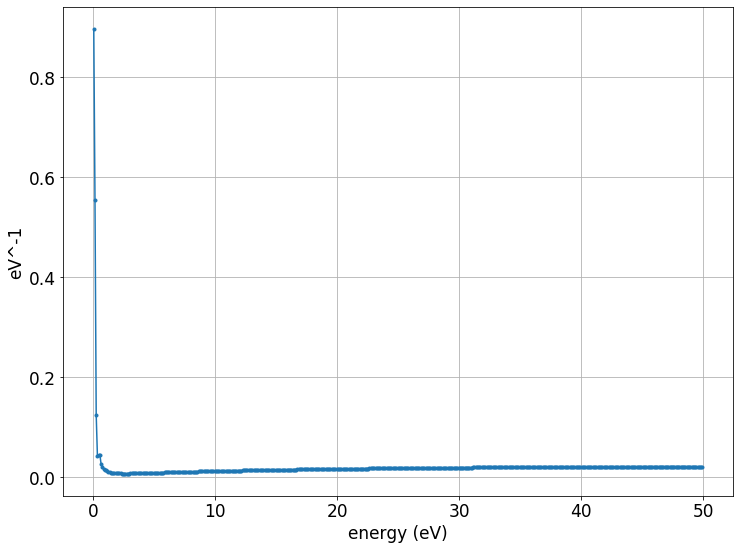

In [60]:
eedf.plot_normalized_eedf()

Text(0.5, 1.0, 'Te vs. t')

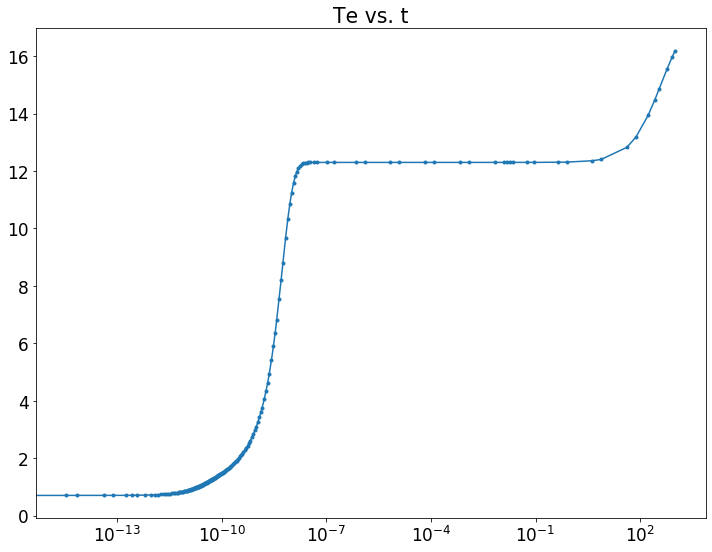

In [61]:
Te_seq = []
ne_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_temperature_in_eV)
    ne_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')
plt.title("Te vs. t")

Text(0.5, 1.0, 'ne vs. t')

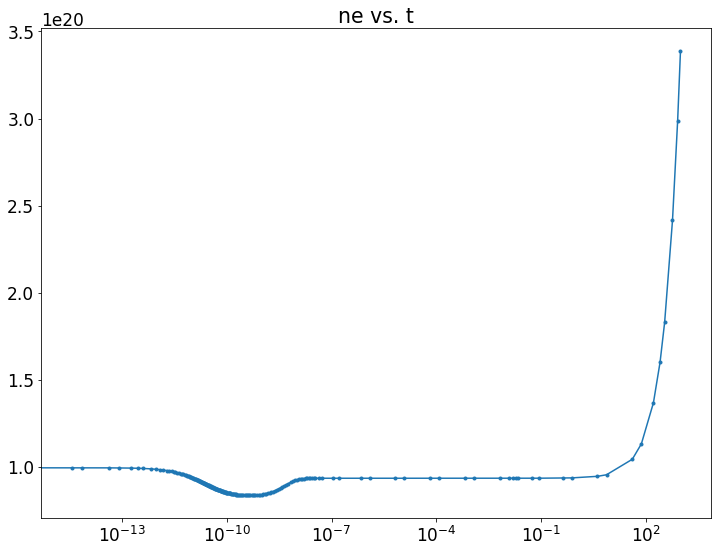

In [62]:
plt.semilogx(sol.t, ne_seq, marker='.')
plt.title("ne vs. t")

In [63]:
sol.y

array([[2.5e+38, 2.5e+38, 2.5e+38, 2.6e+38, 2.7e+38, ..., 1.8e+39, 1.8e+39, 1.8e+39, 1.9e+39, 1.9e+39],
       [3.8e+38, 3.8e+38, 3.8e+38, 3.9e+38, 4.0e+38, ..., 8.7e+38, 9.2e+38, 1.0e+39, 1.1e+39, 1.2e+39],
       [4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, 4.3e+38, ..., 1.2e+38, 1.4e+38, 1.9e+38, 2.3e+38, 2.7e+38],
       [4.3e+38, 4.3e+38, 4.3e+38, 4.3e+38, 4.3e+38, ..., 3.1e+37, 3.8e+37, 5.7e+37, 7.6e+37, 9.1e+37],
       [4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, ..., 4.0e+37, 4.7e+37, 6.4e+37, 8.2e+37, 9.4e+37],
       ...,
       [1.5e+09, 1.5e+09, 1.5e+09, 1.6e+09, 1.6e+09, ..., 1.9e+37, 2.3e+37, 3.1e+37, 3.9e+37, 4.5e+37],
       [1.3e+09, 1.3e+09, 1.3e+09, 1.4e+09, 1.4e+09, ..., 1.9e+37, 2.2e+37, 3.1e+37, 3.9e+37, 4.5e+37],
       [1.2e+09, 1.2e+09, 1.2e+09, 1.2e+09, 1.2e+09, ..., 1.9e+37, 2.2e+37, 3.1e+37, 3.9e+37, 4.4e+37],
       [1.0e+09, 1.0e+09, 1.0e+09, 1.0e+09, 1.1e+09, ..., 1.8e+37, 2.2e+37, 3.0e+37, 3.8e+37, 4.4e+37],
       [8.7e+08, 8.7e+08, 8.7e+08, 8.8e+08, 8.9e+08,

In [64]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.set_flux(total_species_density=total_species_density)

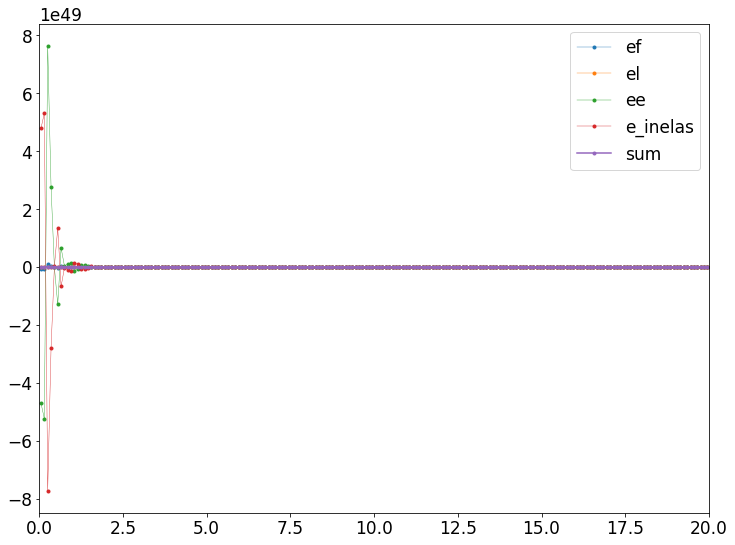

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef(), 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el(), 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee(), 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density), 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density), 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,20))
ax.legend()

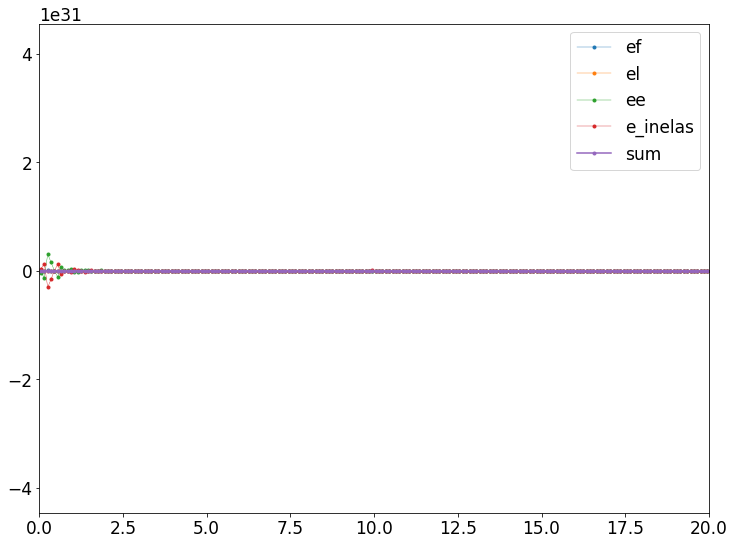

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point, 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point, 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,20))
ax.legend()

In [67]:
energy_gain_ef = (eedf._get_deriv_ef()*eedf.energy_point).sum()
energy_lose_el = (eedf._get_deriv_el()*eedf.energy_point).sum()
energy_gain_ee = (eedf._get_deriv_ee()*eedf.energy_point).sum()
energy_gain_e_inelas = (eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point).sum()
energy_gain_net = (eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point).sum()

Text(0.5, 1.0, 'Energy Gain')

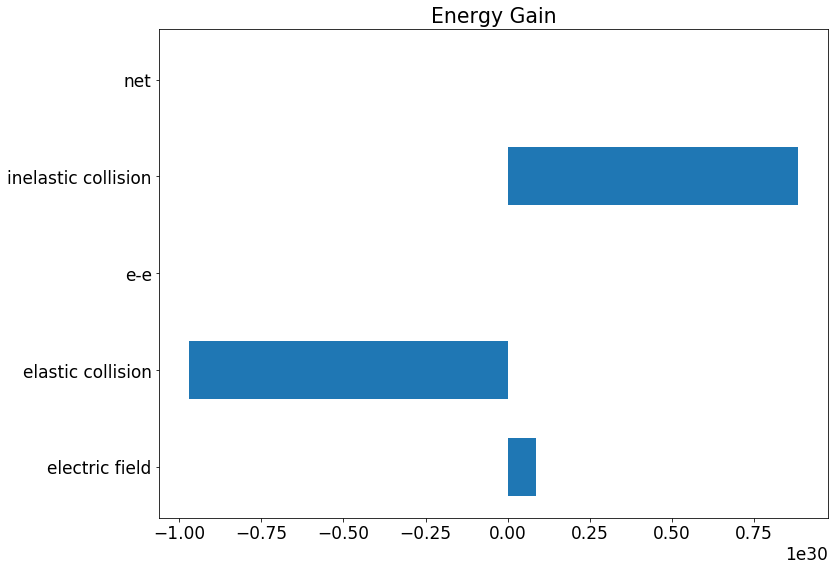

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(5),
        width=[energy_gain_ef, energy_lose_el, energy_gain_ee, energy_gain_e_inelas, energy_gain_net],
       height=0.6)
ax.set_yticks(range(5))
ax.set_yticklabels(['electric field', 'elastic collision', 'e-e', 'inelastic collision', 'net'])
ax.set_title("Energy Gain")

In [69]:
result_df = eedf.inelas_rctn_info
result_df.sort_values(by=['rate const'], ascending=False).head()

,formula,type,threshold_eV,rate const,energy lose
210,E + CO2(v1) => E + CO2,DEEXCITATION,-2.9e-01,5.0e-15,-1.5e-15
212,E + CO2(v2) => E + CO2(v1),DEEXCITATION,-2.9e-01,5.0e-15,-1.4e-15
215,E + CO2(v3) => E + CO2(v2),DEEXCITATION,-2.9e-01,5.0e-15,-1.4e-15
219,E + CO2(v4) => E + CO2(v3),DEEXCITATION,-2.8e-01,5.0e-15,-1.4e-15
224,E + CO2(v5) => E + CO2(v4),DEEXCITATION,-2.8e-01,5.0e-15,-1.4e-15


In [70]:
result_df[result_df['type']=='EXCITATION'].sort_values(by=['rate const'], ascending=False)

,formula,type,threshold_eV,rate const,energy lose
209,E + CO2(v19) => E + CO2(v20),EXCITATION,2.3e-01,3.5e-15,8.2e-16
207,E + CO2(v18) => E + CO2(v19),EXCITATION,2.4e-01,3.5e-15,8.3e-16
204,E + CO2(v17) => E + CO2(v18),EXCITATION,2.4e-01,3.5e-15,8.4e-16
200,E + CO2(v16) => E + CO2(v17),EXCITATION,2.4e-01,3.5e-15,8.6e-16
195,E + CO2(v15) => E + CO2(v16),EXCITATION,2.4e-01,3.5e-15,8.7e-16
189,E + CO2(v14) => E + CO2(v15),EXCITATION,2.5e-01,3.5e-15,8.8e-16
182,E + CO2(v13) => E + CO2(v14),EXCITATION,2.5e-01,3.5e-15,8.9e-16
174,E + CO2(v12) => E + CO2(v13),EXCITATION,2.5e-01,3.5e-15,9.0e-16
165,E + CO2(v11) => E + CO2(v12),EXCITATION,2.6e-01,3.5e-15,9.1e-16
155,E + CO2(v10) => E + CO2(v11),EXCITATION,2.6e-01,3.5e-15,9.2e-16


limit_output extension: Maximum message size of 10000 exceeded with 11362 characters

In [71]:
result_df[result_df['formula'].str.endswith('E + H + H')].sort_values(by=['rate const'], ascending=False)

,formula,type,threshold_eV,rate const,energy lose


In [72]:
result_df[result_df['formula'].str.endswith('E + CO + O')].sort_values(by=['rate const'], ascending=False)

,formula,type,threshold_eV,rate const,energy lose
